## Import Libraries

In [227]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
import warnings


## Reading the Dataset

In [228]:
data = pd.read_csv('LoanData.csv')

# Preview the dataset
data.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


##  Exploratory Data Analysis: Descriptive Statistics

In [229]:
# Descriptive statistics for number-based columns
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [230]:
# Descriptive statistics for categorically-based columns
data.describe(include = 'object')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [231]:
# Exploring the Target Variable
data['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

## Data Cleaning

In [232]:
# Checking for missing values
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [233]:
# Using mode values to impute categorical columns

data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

# Using median values to impute the numerical columns

data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].median())
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median())
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].median())

# Verifying no missing values are left
data.isnull().sum().sum()                           

np.int64(0)

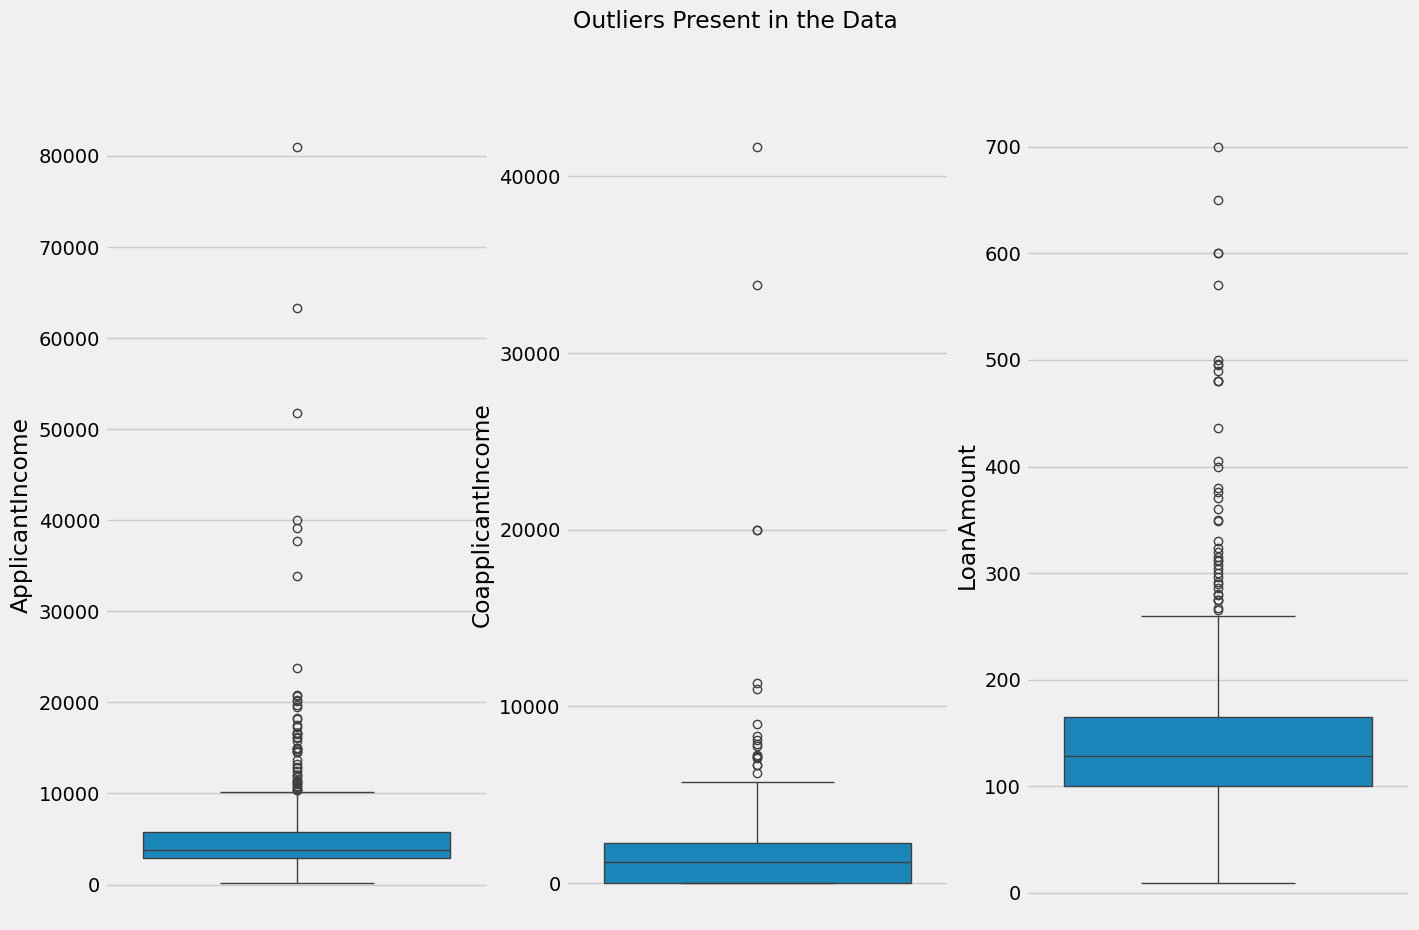

In [234]:
# Checking for outliers in the Applicant Income, Coapplicant Income and Loan Amount columns

# Set figure size
plt.figure(figsize=(15, 10))

plt.subplot(1, 3, 1)
sns.boxplot(data['ApplicantIncome'])

plt.subplot(1, 3, 2)
sns.boxplot(data['CoapplicantIncome'])

plt.subplot(1, 3, 3)
sns.boxplot(data['LoanAmount'])

plt.suptitle('Outliers Present in the Data')
plt.show()

In [235]:
# Removing outliers from the Applicant Income column

print("Column shapre prior to outlier removal: ", data.shape)

data = data[data['ApplicantIncome'] < 25000]

print("Column shape after outlier removal: ", data.shape)

Column shapre prior to outlier removal:  (614, 13)
Column shape after outlier removal:  (607, 13)


In [236]:
# Removing outliers from the Coapplicant Income column

print("Column shapre prior to outlier removal: ", data.shape)

data = data[data['CoapplicantIncome'] < 10000]

print("Column shape after outlier removal: ", data.shape)

Column shapre prior to outlier removal:  (607, 13)
Column shape after outlier removal:  (601, 13)


In [237]:
# Removing outliers from the Loan Amount Column

print("Column shapre prior to outlier removal: ", data.shape)

data = data[data['LoanAmount'] < 400]

print("After Removing Outliers ", data.shape)

Column shapre prior to outlier removal:  (601, 13)
After Removing Outliers  (590, 13)


## Univariate Data Analysis

<Axes: xlabel='LoanAmount', ylabel='Density'>

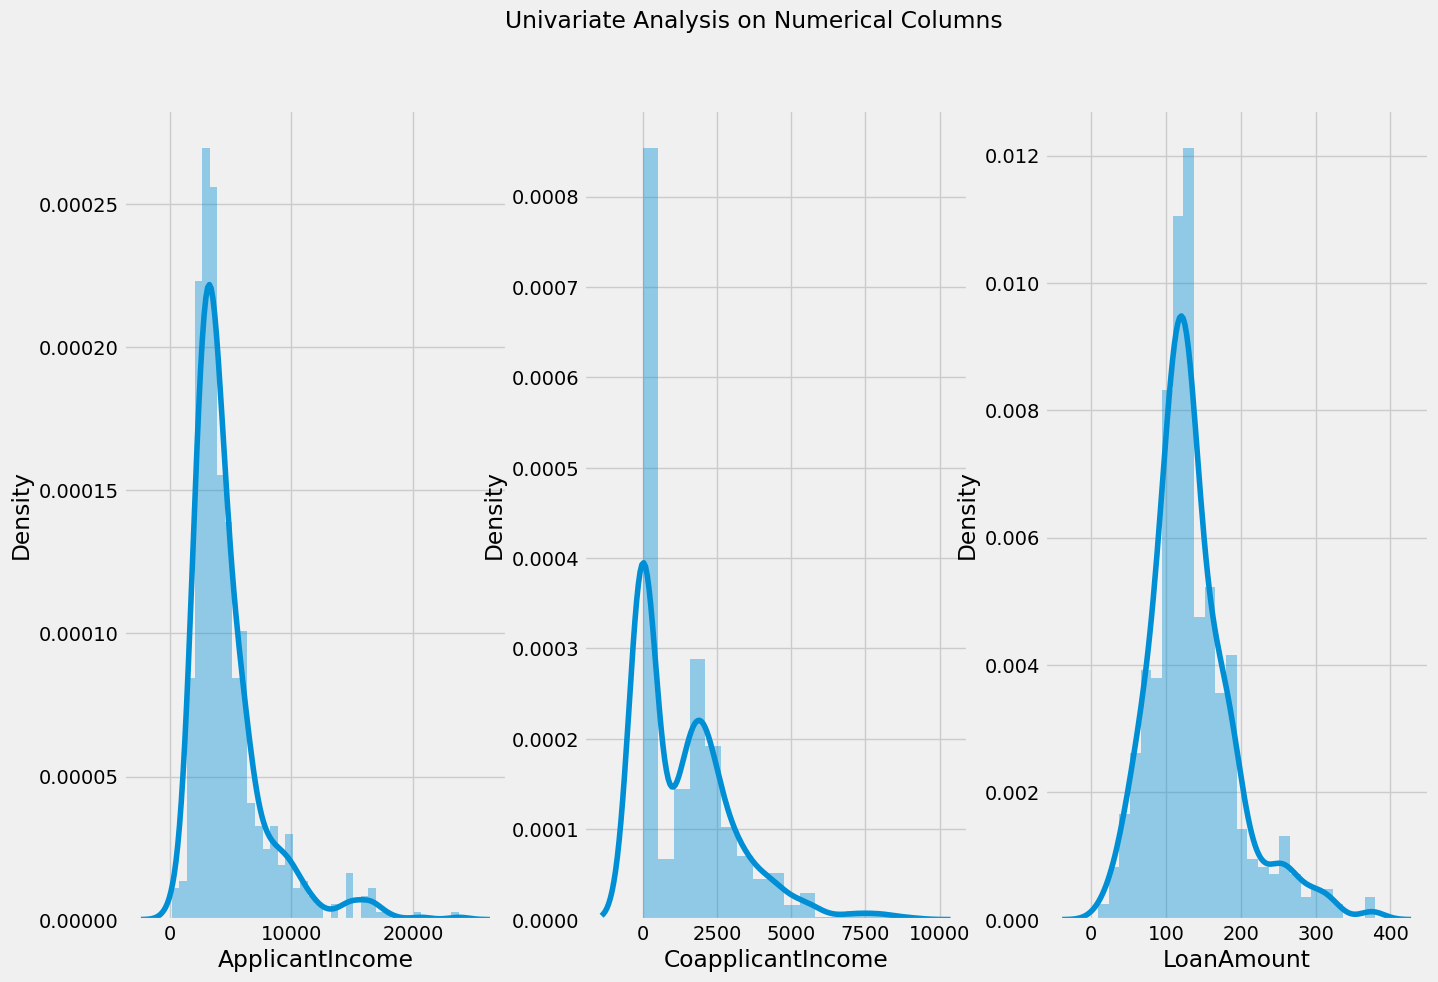

In [238]:
# Univariate Analysis on Applicant Income, Co-Applicant Income, and Loan Amount Columns
# Set figure size
plt.figure(figsize=(15, 10))

plt.suptitle('Univariate Analysis on Numerical Columns')

plt.subplot(1,3, 1)
sns.distplot(data['ApplicantIncome'])

plt.subplot(1,3, 2)
sns.distplot(data['CoapplicantIncome'])

plt.subplot(1,3, 3)
sns.distplot(data['LoanAmount'])


<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

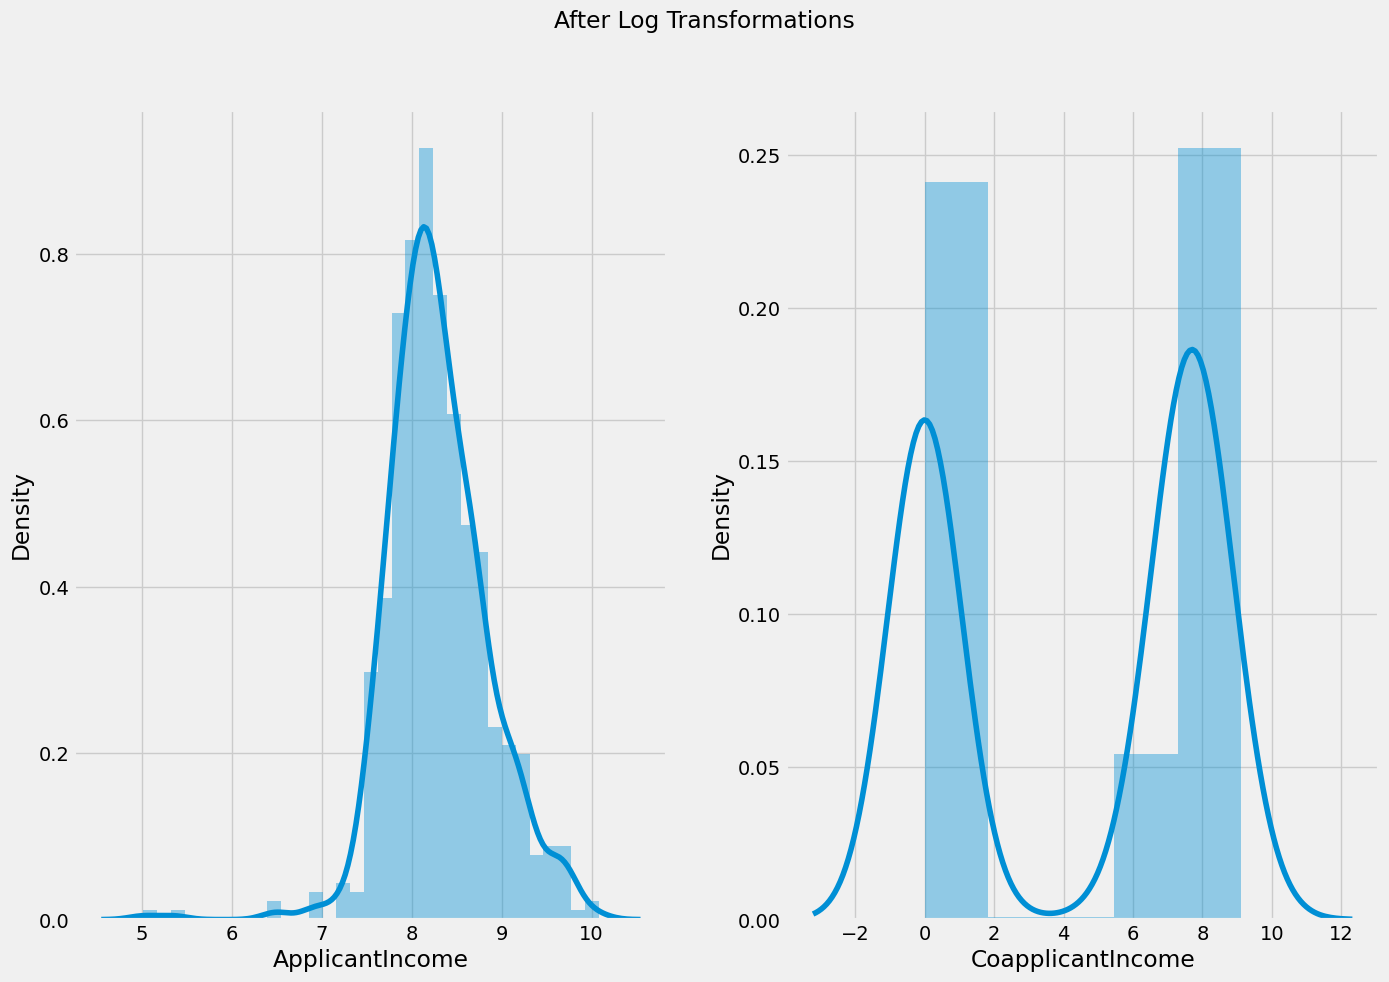

In [239]:
# Removing skewness from ApplicantIncome and Coapplicant Income through Log Transformation
data['ApplicantIncome'] = np.log(data['ApplicantIncome'])
data['CoapplicantIncome'] = np.log1p(data['CoapplicantIncome'])

# Set figure size
plt.figure(figsize=(15, 10))

# Validating the transformation
plt.suptitle('After Log Transformations')

plt.subplot(1, 2, 1)
sns.distplot(data['ApplicantIncome'])

plt.subplot(1, 2, 2)
sns.distplot(data['CoapplicantIncome'])


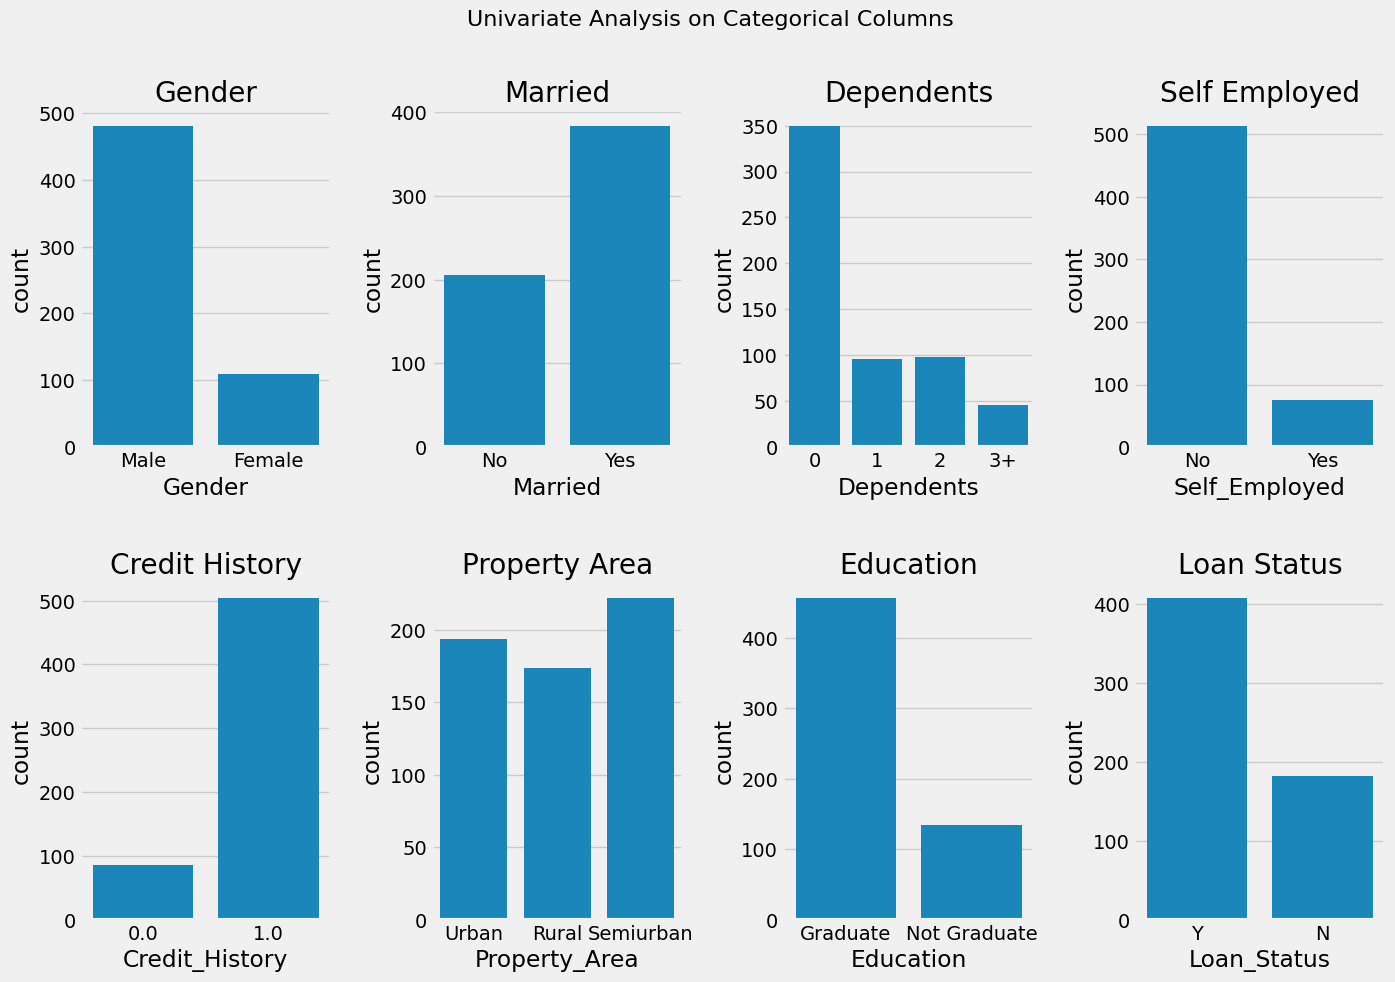

In [240]:
# Set figure size
plt.figure(figsize=(15, 10))

# Plotting charts
plt.subplot(2, 4, 1)
sns.countplot(x='Gender', data=data)
plt.title('Gender')

plt.subplot(2, 4, 2)
sns.countplot(x='Married', data=data)
plt.title('Married')

plt.subplot(2, 4, 3)
sns.countplot(x='Dependents', data=data)
plt.title('Dependents')

plt.subplot(2, 4, 4)
sns.countplot(x='Self_Employed', data=data)
plt.title('Self Employed')

plt.subplot(2, 4, 5)
sns.countplot(x='Credit_History', data=data)
plt.title('Credit History')

plt.subplot(2, 4, 6)
sns.countplot(x='Property_Area', data=data)
plt.title('Property Area')

plt.subplot(2, 4, 7)
sns.countplot(x='Education', data=data)
plt.title('Education')

plt.subplot(2, 4, 8)
sns.countplot(x='Loan_Status', data=data)
plt.title('Loan Status')

# Adjusting spacing
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.suptitle('Univariate Analysis on Categorical Columns', fontsize=16)
plt.show()


### Bivariate Data Analysis

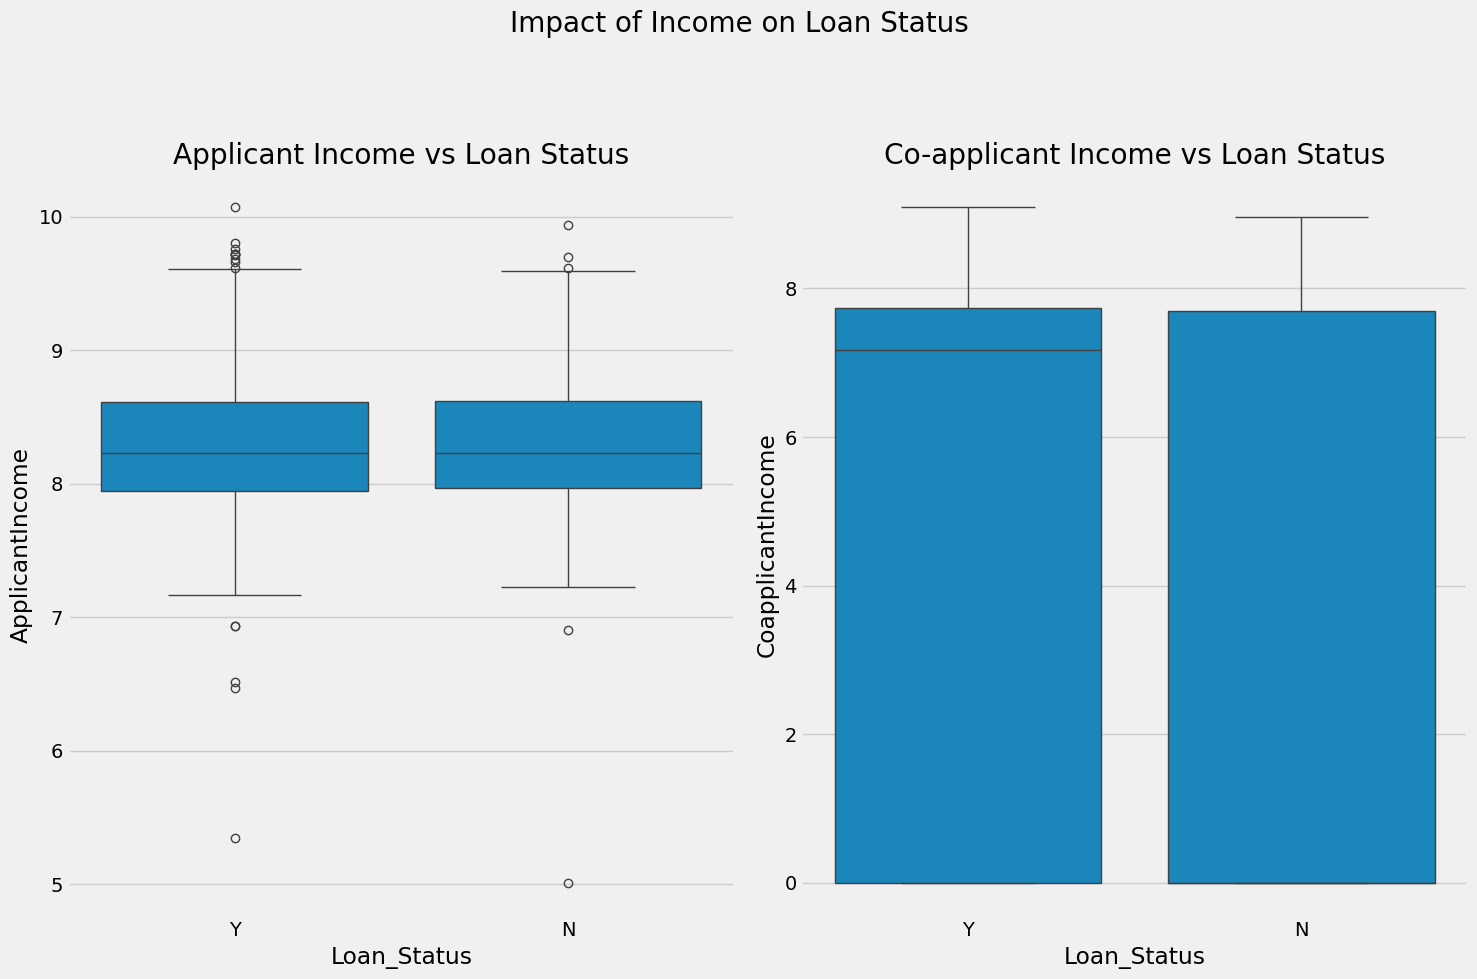

In [241]:
# Assessing the impact of income on loan status

# Set figure size
plt.figure(figsize=(15, 10))

plt.suptitle('Impact of Income on Loan Status\n', fontsize=20)

plt.subplot(1, 2, 1)
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=data)
plt.title('Applicant Income vs Loan Status')

plt.subplot(1, 2, 2)
sns.boxplot(x='Loan_Status', y='CoapplicantIncome', data=data)
plt.title('Co-applicant Income vs Loan Status')

# Adjusting Plot spacing
plt.tight_layout(rect=[0, 0, 1, 0.95])  
plt.show()


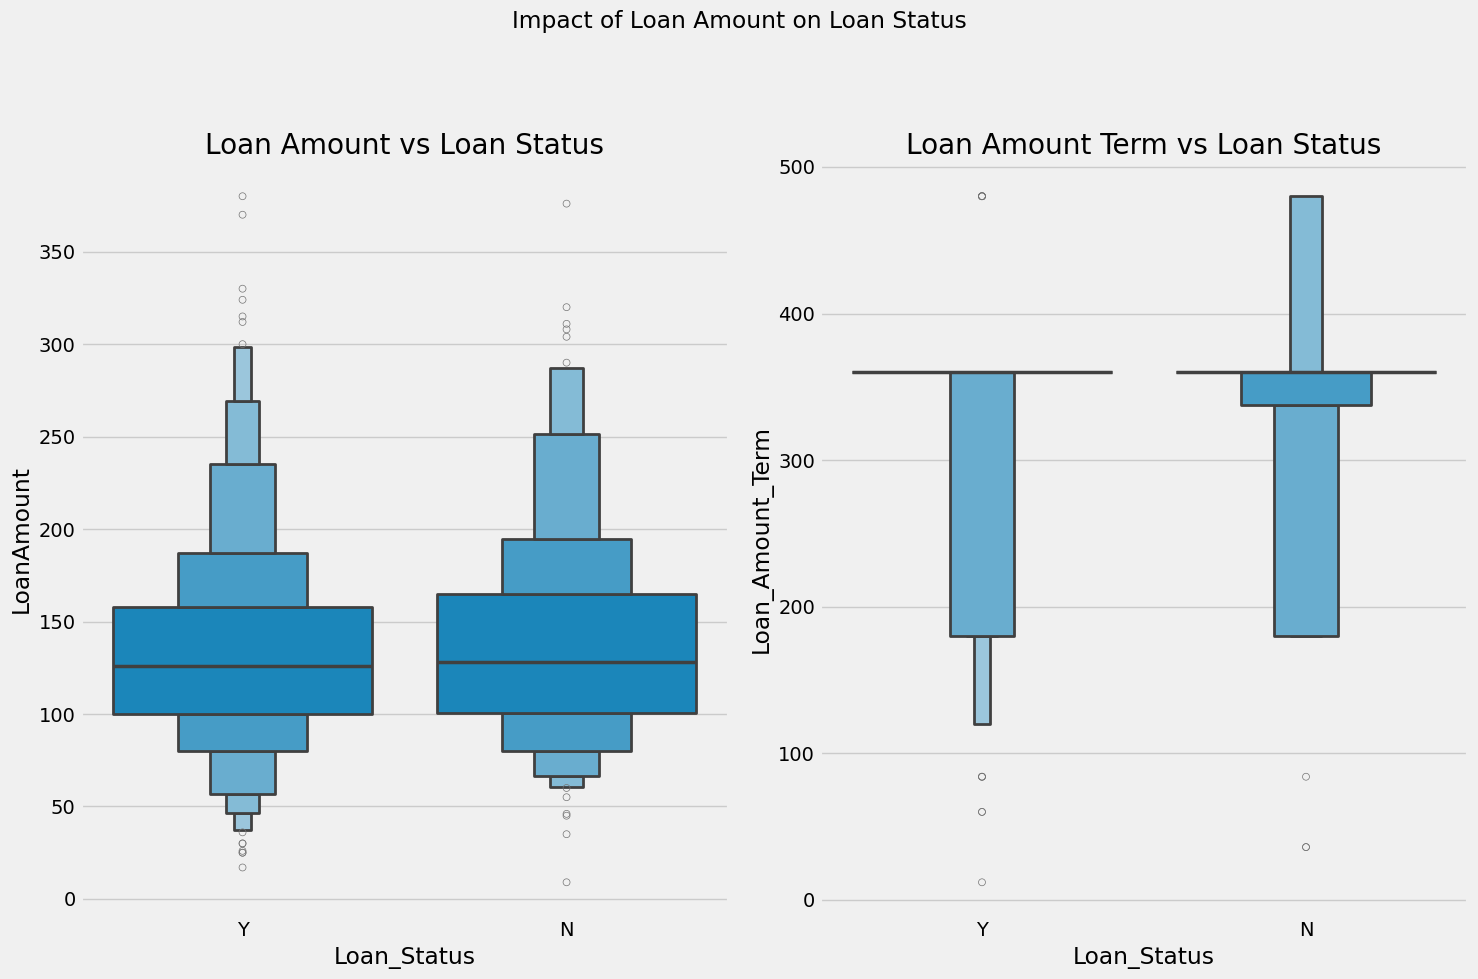

In [242]:
# Assessing the impact of Amount on Loan Status

# Set figure size
plt.figure(figsize=(15, 10))

plt.suptitle('Impact of Loan Amount on Loan Status\n')

# Plot the first boxenplot for Loan Amount
plt.subplot(1, 2, 1)
sns.boxenplot(x='Loan_Status', y='LoanAmount', data=data)
plt.title('Loan Amount vs Loan Status')

# Plot the second boxenplot for Loan Amount Term
plt.subplot(1, 2, 2)
sns.boxenplot(x='Loan_Status', y='Loan_Amount_Term', data=data)
plt.title('Loan Amount Term vs Loan Status')

# Adjusting plot spacing
plt.tight_layout(rect=[0, 0, 1, 0.95])


### Comparing Categorical Data with Target Columns

In [243]:
# Viewing the relationship between Categorical Columns and Loan Status
columns_to_analyze = {
    'Married': 'Marriage and Loan Status',
    'Dependents': 'Dependents and Loan Status',
    'Education': 'Education on Loan Status',
    'Self_Employed': 'Employment on Loan Status',
    'Property_Area': 'Property on Loan Status'
}

# Looping through each column and print the crosstab
for column, description in columns_to_analyze.items():
    print(description + ":")
    print(pd.crosstab(data['Loan_Status'], data[column]))
    print('\n')


Marriage and Loan Status:
Married       No  Yes
Loan_Status          
N             76  106
Y            130  278


Dependents and Loan Status:
Dependents     0   1   2  3+
Loan_Status                 
N            110  33  24  15
Y            240  63  74  31


Education on Loan Status:
Education    Graduate  Not Graduate
Loan_Status                        
N                 130            52
Y                 326            82


Employment on Loan Status:
Self_Employed   No  Yes
Loan_Status            
N              157   25
Y              357   51


Property on Loan Status:
Property_Area  Rural  Semiurban  Urban
Loan_Status                           
N                 66         51     65
Y                108        171    129




## Data Preparation

In [244]:
# Checking which Object-type Columns to be dropped from the dataset
data.select_dtypes('object').head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


In [245]:
# Dropping the loan id column

print("Column shapre prior to outlier removal: ", data.shape)

data = data.drop(['Loan_ID'], axis = 1)

print("Column shape after outlier removal: ", data.shape)

Column shapre prior to outlier removal:  (590, 13)
Column shape after outlier removal:  (590, 12)


In [246]:
# Encoding remaining Categorical Columns

data['Gender'] = data['Gender'].replace(('Male','Female'),(1, 0))
data['Married'] = data['Married'].replace(('Yes','No'),(1, 0))
data['Education'] = data['Education'].replace(('Graduate','Not Graduate'), (1, 0))
data['Self_Employed'] = data['Self_Employed'].replace(('Yes','No'), (1, 0))
data['Loan_Status'] = data['Loan_Status'].replace(('Y','N'), (1, 0))

In [247]:
# Group-Encoding Property Area and Dependents Columns since EDA section variations in the variables had similar impact on Loan Status
data['Property_Area'] = data['Property_Area'].replace(('Urban','Semiurban', 'Rural'),(1, 1, 0))

data['Dependents'] = data['Dependents'].replace(('0', '1', '2', '3+'), (0, 1, 1, 1))

In [248]:
# Verifying encoding changes
data.select_dtypes('object').columns

Index([], dtype='object')

In [249]:
# Splitting the target variable from the dataset

y = data['Loan_Status']
x = data.drop(['Loan_Status'], axis = 1)

# Verifying the split
print("Shape of x :", x.shape)
print("Shape of y :", y.shape)

Shape of x : (590, 11)
Shape of y : (590,)


### Resampling for Balancing the Data

In [250]:
# Resampling the data since it is highly imbalanced; making this an essential step.
# Over Sampling Technique is the method that will be used to resample the data using SMOTE

x_resample, y_resample = SMOTE().fit_resample(x, y.values.ravel())

# Printing DF shapes of the resampled data
print("After Resampling:")
print("x_resample shape:", x_resample.shape)
print("y_resample shape:", y_resample.shape)

After Resampling:
x_resample shape: (816, 11)
y_resample shape: (816,)


In [251]:
# Printing Target Variable counts after resampling

print("Before Resampling :")
print(y.value_counts())

print("After Resampling :")
y_resample = pd.DataFrame(y_resample)
print(y_resample[0].value_counts())

Before Resampling :
Loan_Status
1    408
0    182
Name: count, dtype: int64
After Resampling :
0
1    408
0    408
Name: count, dtype: int64


In [252]:
# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_resample, y_resample, test_size = 0.2, random_state = 0)

# Printing the DF Shape Sizes
print("Shape of the x Train :", x_train.shape)
print("Shape of the y Train :", y_train.shape)
print("Shape of the x Test :", x_test.shape)
print("Shape of the y Test :", y_test.shape)

Shape of the x Train : (652, 11)
Shape of the y Train : (652, 1)
Shape of the x Test : (164, 11)
Shape of the y Test : (164, 1)


## Machine Learning Modelling

Training Accuracy : 0.7883435582822086
Testing Accuracy : 0.7987804878048781


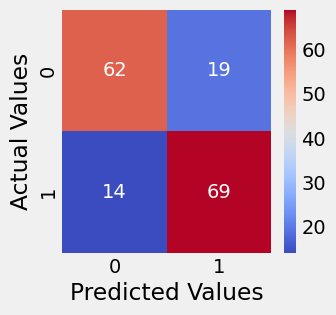

              precision    recall  f1-score   support

           0       0.82      0.77      0.79        81
           1       0.78      0.83      0.81        83

    accuracy                           0.80       164
   macro avg       0.80      0.80      0.80       164
weighted avg       0.80      0.80      0.80       164



In [253]:
# Applying Logistic Regression
model = LogisticRegression(random_state = 0)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# Printing the Results
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

# Printing the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'coolwarm', fmt = '.8g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()


# Printing the Classification Report
cr = classification_report(y_test, y_pred)
print(cr)


### Applying Gradient Boosting

Training Accuracy : 0.9125766871165644
Testing Accuracy : 0.8109756097560976


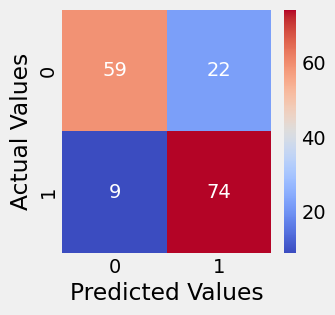

              precision    recall  f1-score   support

           0       0.87      0.73      0.79        81
           1       0.77      0.89      0.83        83

    accuracy                           0.81       164
   macro avg       0.82      0.81      0.81       164
weighted avg       0.82      0.81      0.81       164

[0.77272727 0.77272727 0.73846154 0.89230769 0.83076923 0.8
 0.90769231 0.76923077 0.78461538 0.81538462]


In [254]:
# Applying DecisionTrees
model =  GradientBoostingClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# Printing the Results
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

# Printing the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'coolwarm', fmt = '.8g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

# Printing the Classification Report
cr = classification_report(y_test, y_pred)
print(cr)

# Printing the Cross Validation Scores
clf = GradientBoostingClassifier(random_state = 0)
scores = cross_val_score(clf, x_train, y_train, cv=10)
print(scores)